### Importing all the required Libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly as py

### Load the dataset

In [9]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

data = fetch_california_housing(as_frame=True)
df = data.frame

print(df.shape)
print(df.head(10))


(20640, 9)
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5  4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6  3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
7  3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   
8  2.0804      42.0  4.294118   1.117647      1206.0  2.026891     37.84   
9  3.6912      52.0  4.970588   0.990196      1551.0  2.172269     37.84   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25

### Descerptive Stat

In [8]:
df.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### creating a corealation matrix and graphs

In [10]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


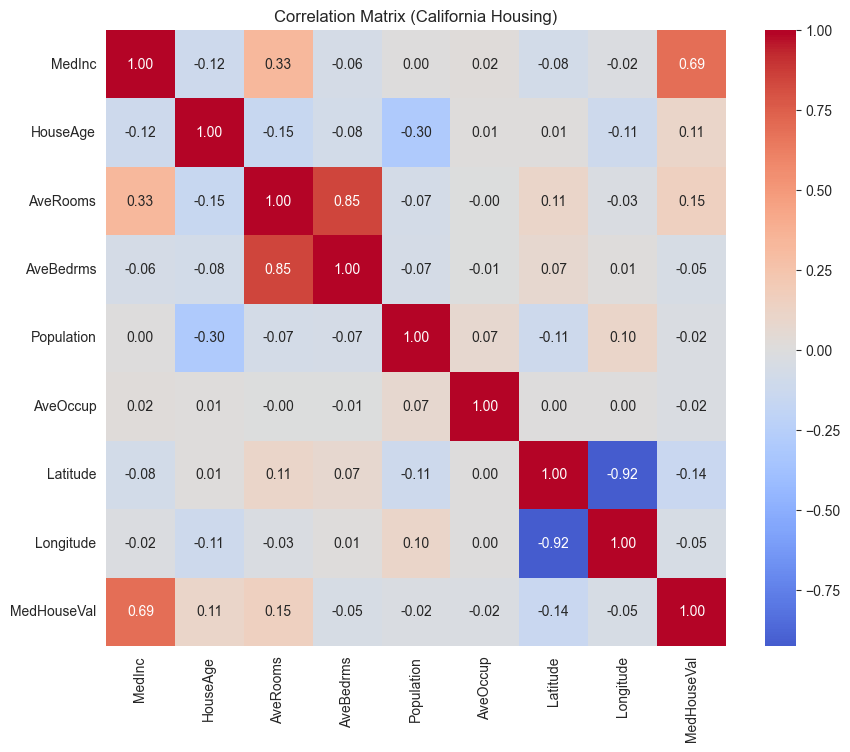

In [12]:
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0, cbar=True)
plt.title("Correlation Matrix (California Housing)")
plt.show()

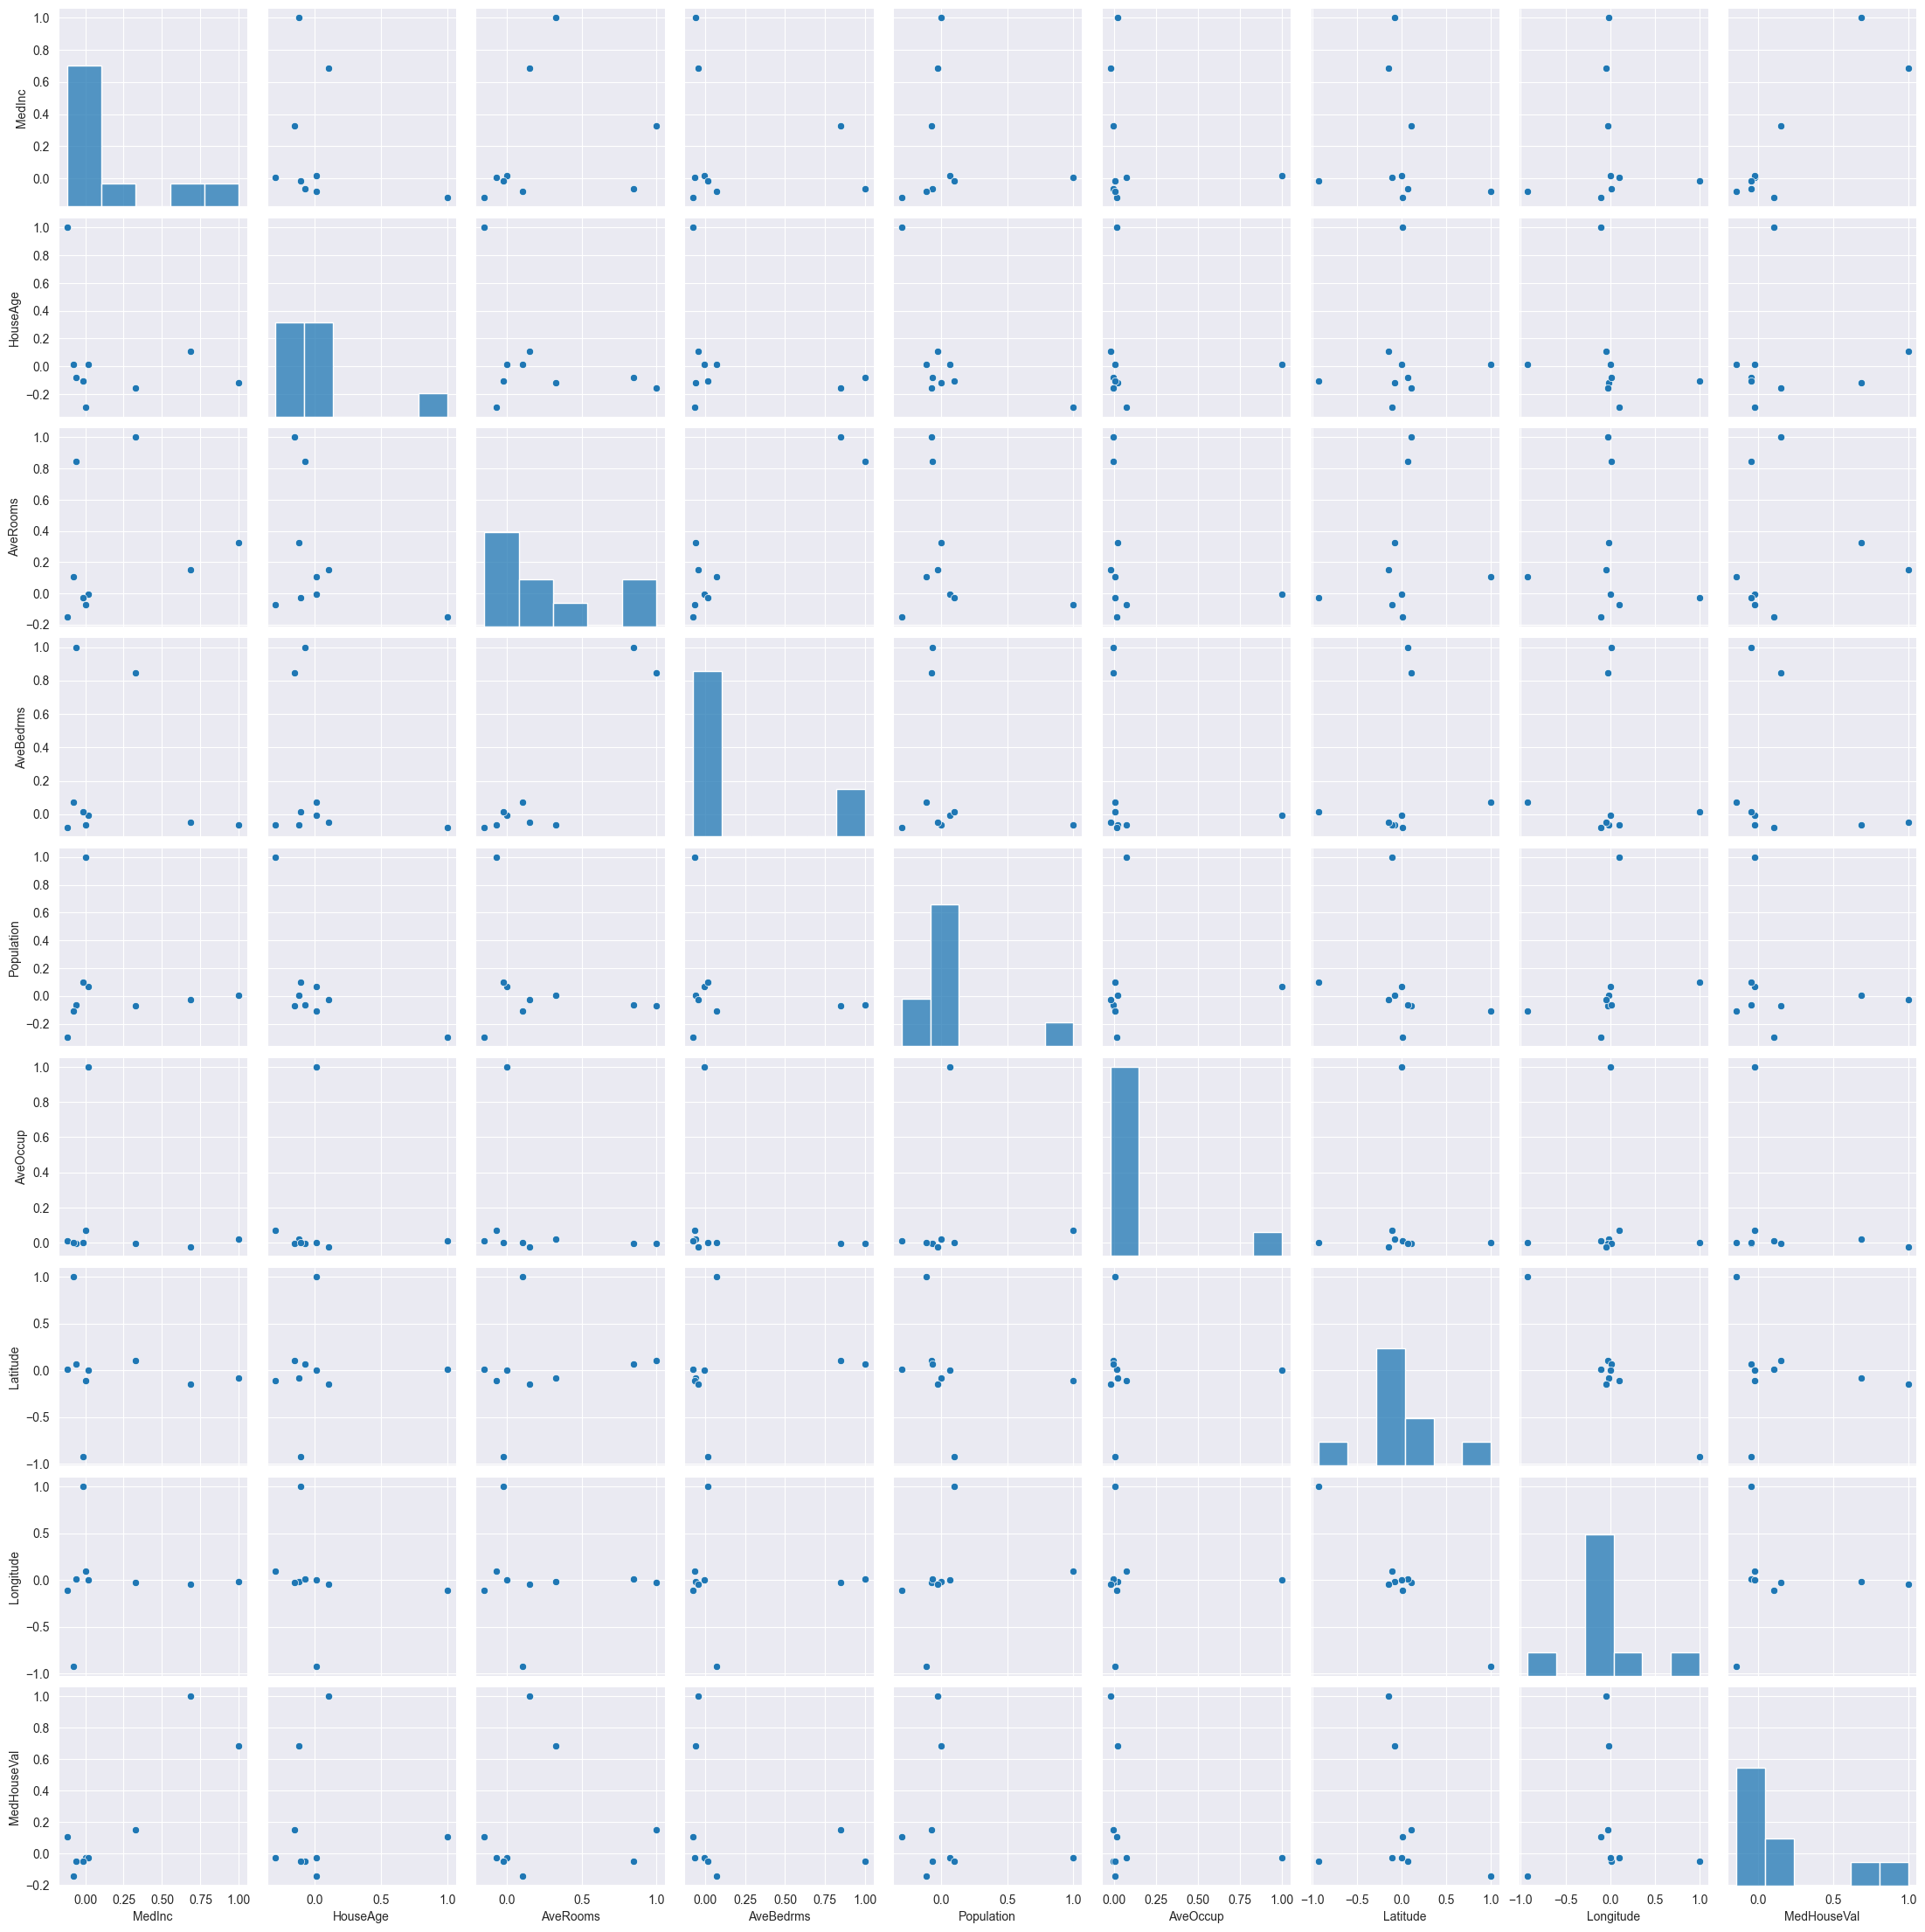

In [11]:
sns.pairplot(df.corr())

### Split data and Standerdize

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### MODEL DETAILS

In [17]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# fit
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred = linreg.predict(X_test_scaled)

# metrics (version-agnostic)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Baseline Linear Regression Performance:")
print(f"  RMSE: {rmse:.3f}")
print(f"  MAE : {mae:.3f}")
print(f"  R²  : {r2:.3f}")


Baseline Linear Regression Performance:
  RMSE: 0.746
  MAE : 0.533
  R²  : 0.576


### Feature selection and then its outcome

In [18]:
from sklearn.feature_selection import RFE

# Initialize RFE with Linear Regression
selector = RFE(estimator=LinearRegression(), n_features_to_select=5)
selector.fit(X_train_scaled, y_train)

# Transform train and test
X_train_sel = selector.transform(X_train_scaled)
X_test_sel = selector.transform(X_test_scaled)

# Fit Linear Regression on selected features
linreg.fit(X_train_sel, y_train)
y_pred_sel = linreg.predict(X_test_sel)

# Evaluate
mse_sel = mean_squared_error(y_test, y_pred_sel)
rmse_sel = np.sqrt(mse_sel)
mae_sel = mean_absolute_error(y_test, y_pred_sel)
r2_sel = r2_score(y_test, y_pred_sel)

print("Feature Selection (RFE) Performance:")
print(f"  RMSE: {rmse_sel:.3f}")
print(f"  MAE : {mae_sel:.3f}")
print(f"  R²  : {r2_sel:.3f}")

# Optional: see which features were selected
selected_features = X.columns[selector.support_]
print("Selected Features:", selected_features.tolist())

Feature Selection (RFE) Performance:
  RMSE: 0.753
  MAE : 0.539
  R²  : 0.567
Selected Features: ['MedInc', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude']


### Feature generation

In [28]:

df['RoomsPerPerson'] = df['AveRooms'] / df['AveOccup']

df['BedroomsPerRoom'] = df['AveBedrms'] / df['AveRooms']

print(df.shape)
print(df.head(5))

(20640, 11)
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  RoomsPerPerson  BedroomsPerRoom  
0    -122.23        4.526        2.732919         0.146591  
1    -122.22        3.585        2.956685         0.155797  
2    -122.24        3.521        2.957661         0.129516  
3    -122.25        3.413        2.283154         0.184458  
4    -122.25        3.422        2.879646         0.172096  


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=5)
selector.fit(X_train_scaled, y_train)

X_train_sel = selector.transform(X_train_scaled)
X_test_sel = selector.transform(X_test_scaled)

linreg.fit(X_train_sel, y_train)
y_pred_sel = linreg.predict(X_test_sel)

# Metrics
rmse_sel = np.sqrt(mean_squared_error(y_test, y_pred_sel))
mae_sel = mean_absolute_error(y_test, y_pred_sel)
r2_sel = r2_score(y_test, y_pred_sel)

selected_features = X.columns[selector.support_]

print("Selected Features (including new ones):", selected_features.tolist())
print(f"RMSE: {rmse_sel:.3f}, MAE: {mae_sel:.3f}, R²: {r2_sel:.3f}")

Selected Features (including new ones): ['MedInc', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude']
RMSE: 0.753, MAE: 0.539, R²: 0.567


In [39]:
# Feature names used in training
features = ['MedInc', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude']

# Coefficients from the trained Linear Regression model
coefficients = linreg.coef_
intercept = linreg.intercept_

# Put into a DataFrame for easy viewing
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

print("Linear Regression coefficients:")
print(coef_df)
print(f"Intercept: {intercept:.3f}")

Linear Regression coefficients:
     Feature  Coefficient
0     MedInc     0.831935
1   AveRooms    -0.299413
2  AveBedrms     0.339423
3   Latitude    -0.984562
4  Longitude    -0.964060
Intercept: 2.072


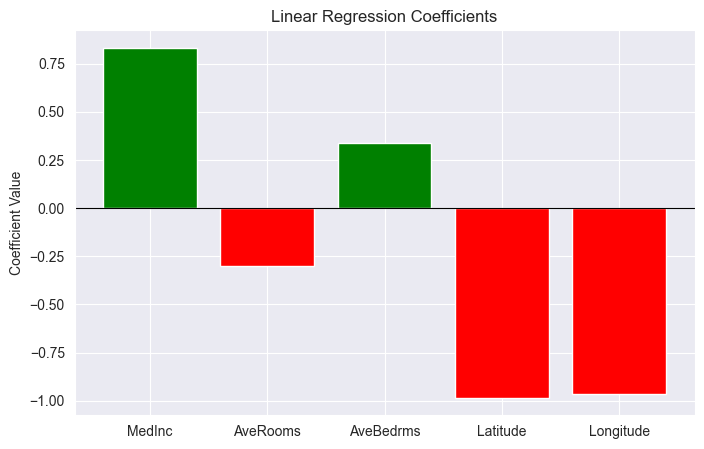

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

# Feature names used in the model
features = ['MedInc', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude']

# Coefficients from trained model
coefficients = linreg.coef_
intercept = linreg.intercept_

# Put into DataFrame
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

# Plot
plt.figure(figsize=(8,5))
colors = ['green' if c > 0 else 'red' for c in coefficients]  # green=positive, red=negative
plt.bar(coef_df['Feature'], coef_df['Coefficient'], color=colors)
plt.axhline(0, color='black', linewidth=0.8)
plt.title('Linear Regression Coefficients')
plt.ylabel('Coefficient Value')
plt.show()

### MODEL OUTCOME TEST

In [38]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Features the model expects
selected_features = ['MedInc', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude']

#  Collect input from the user
user_data = {}
for feature in selected_features:
    value = float(input(f"Enter {feature}: "))
    user_data[feature] = value

# Convert to DataFrame
new_df = pd.DataFrame([user_data])

# Fit a scaler on the training data (only on these 5 features)
scaler_5 = StandardScaler()
scaler_5.fit(X_train[selected_features])  # X_train is your training DataFrame

# Scale the new input
new_scaled = scaler_5.transform(new_df[selected_features])

# Predict using the trained Linear Regression model
predicted_value = linreg.predict(new_scaled)
print(f"\nPredicted Median House Value: {predicted_value[0]:.3f} ($100,000s)")


Predicted Median House Value: -39.016 ($100,000s)


## Linear Regression Analysis: Feature Selection & Generation

### 1. Model Equation
\[
\hat{y} = 2.072 + 0.832 \times \text{MedInc} - 0.299 \times \text{AveRooms} + 0.339 \times \text{AveBedrms} - 0.985 \times \text{Latitude} - 0.964 \times \text{Longitude}
\]


### 2. Coefficients Interpretation

| Feature     | Coefficient | Effect on Prediction |
|------------|-------------|--------------------|
| MedInc     | 0.832       | Higher income → higher value |
| AveRooms   | -0.299      | More rooms → slightly lower value |
| AveBedrms  | 0.339       | More bedrooms → higher value |
| Latitude   | -0.985      | Higher latitude → lower value |
| Longitude  | -0.964      | Higher longitude → lower value |

### 3. Performance Metrics

| Model                  | RMSE  | MAE   | R²    |
|-----------------------|-------|-------|-------|
| Baseline (original)    | 0.746 | 0.533 | 0.576 |
| Selected Features (5)  | 0.753 | 0.539 | 0.567 |

**Interpretation:**
- Minimal difference in RMSE/MAE shows selected features retain most predictive power.
- R² slightly decreased, but model remains interpretable and effective.

### 4. Key Points
- Positive coefficients → increase predicted house value.
- Negative coefficients → decrease predicted value.
- Linear Regression can predict negative values for extreme inputs; interpret predictions within training range.
- Feature selection keeps model simple while maintaining performance.


